In [26]:
import pandas as pd
import matplotlib.pyplot as plt # 基础绘图库（什么都能画，但可能慢、复杂）
import seaborn as sns # 数据可视化专用库（专门用来快速画数据图）


# 中文字体宋体，英文字体新罗马
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 12  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False

In [27]:
df = pd.read_excel('中间数据集\\表1与表2拼接后的数据集.xlsx')
df.head()

,文物编号,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),...,氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),采样位置,风化具体情况
0,1,C,高钾,蓝绿,无风化,69.33,0.0,9.99,6.32,0.87,...,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,NaN,无风化
1,2,A,铅钡,浅蓝,风化,36.28,0.0,1.05,2.34,1.18,...,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,NaN,风化
2,3,A,高钾,蓝绿,无风化,87.05,0.0,5.19,2.01,0.00,...,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,部位1,无风化
3,3,A,高钾,蓝绿,无风化,61.71,0.0,12.37,5.87,1.11,...,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,部位2,无风化
4,4,A,高钾,蓝绿,无风化,65.88,0.0,9.67,7.12,1.56,...,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,NaN,无风化


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


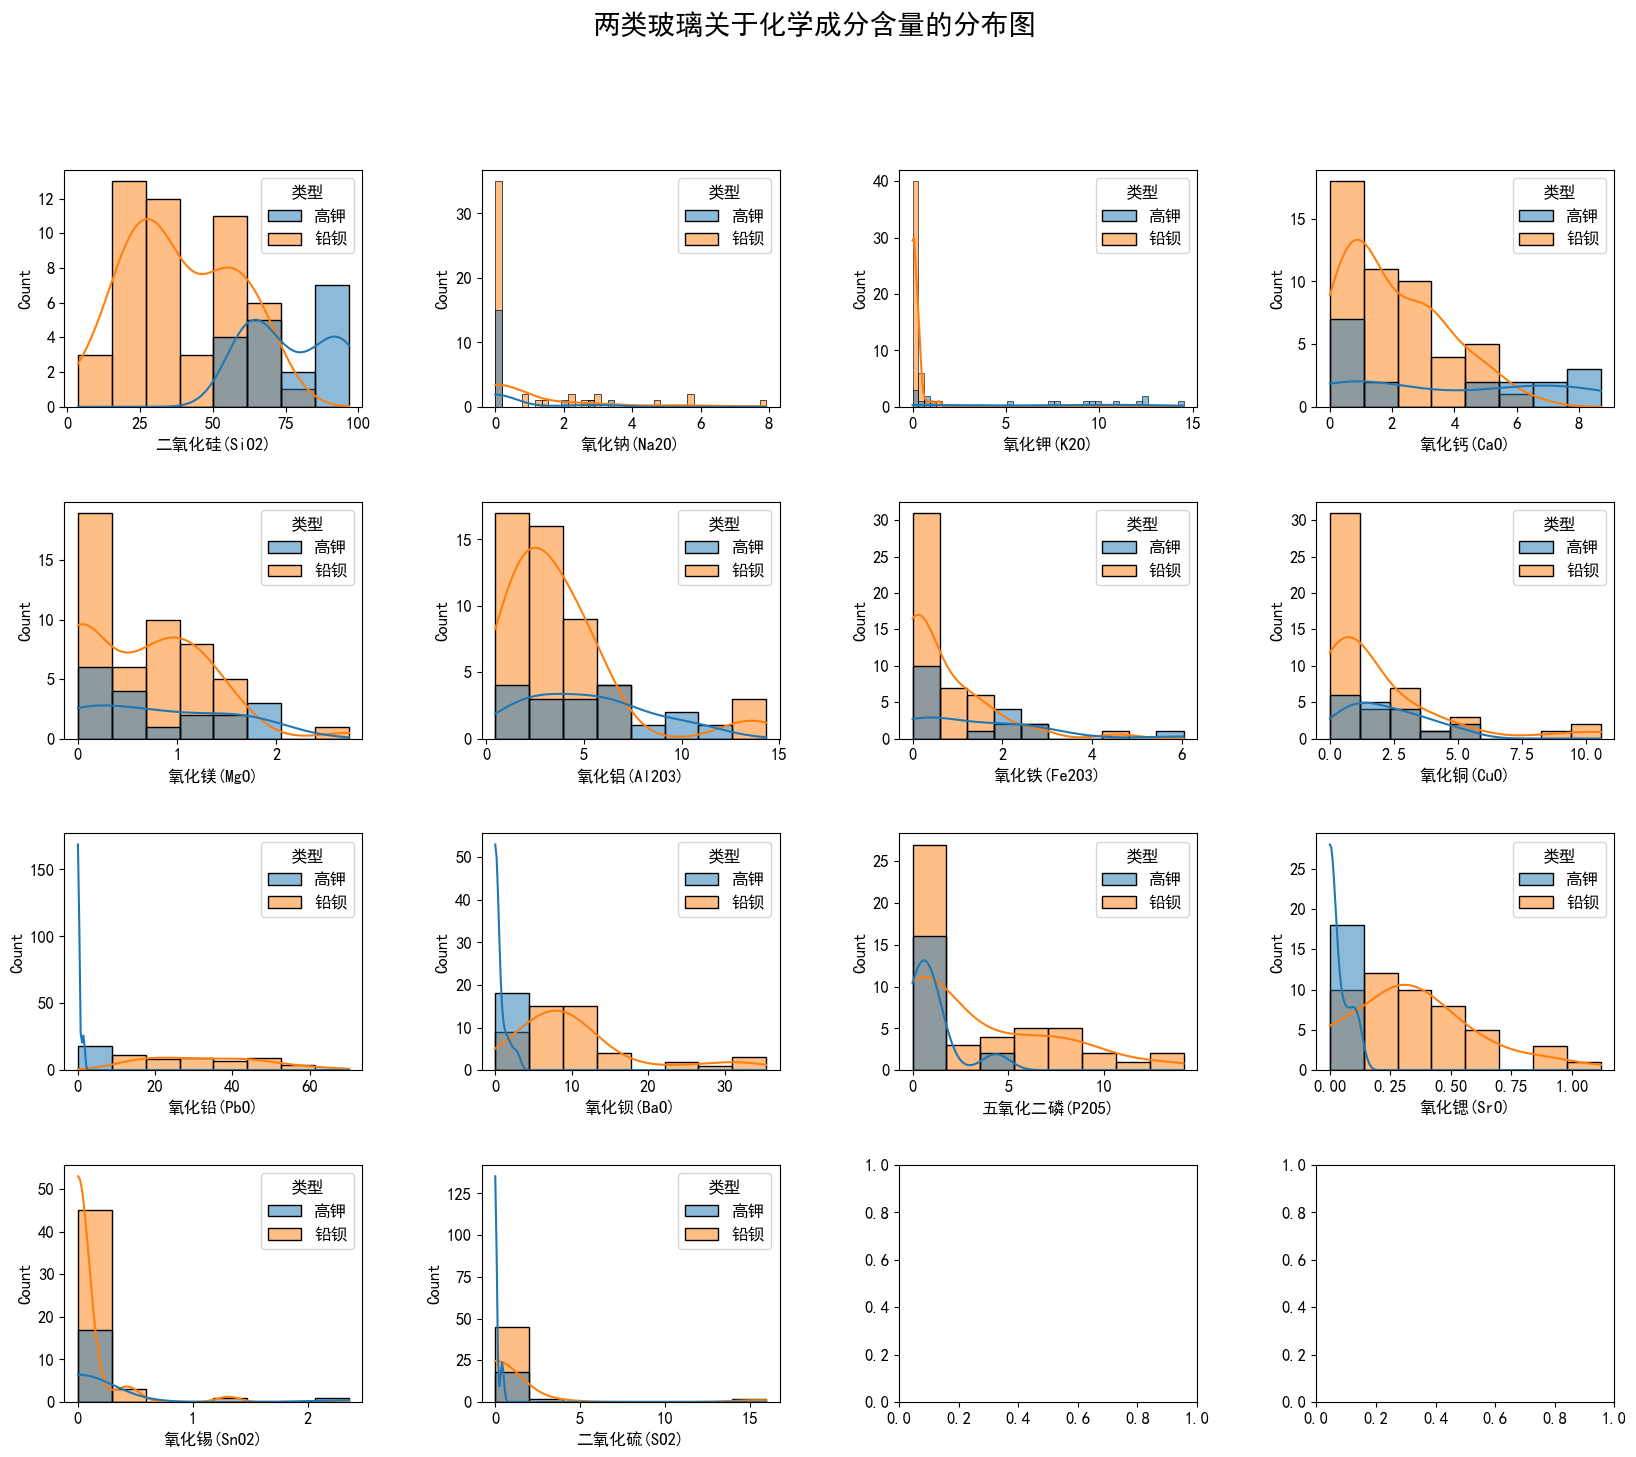

In [28]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))
fig.subplots_adjust(wspace=0.4, hspace=0.4)               # 同一列元素AX之间距离
fig.suptitle('两类玻璃关于化学成分含量的分布图', fontsize=20)

sns.histplot(data=df, x="二氧化硅(SiO2)", hue="类型", kde=True, ax=ax[0][0])
sns.histplot(data=df, x="氧化钠(Na2O)", hue="类型", kde=True, ax=ax[0][1])
sns.histplot(data=df, x="氧化钾(K2O)", hue="类型", kde=True, ax=ax[0][2])
sns.histplot(data=df, x="氧化钙(CaO)", hue="类型", kde=True, ax=ax[0][3])
sns.histplot(data=df, x="氧化镁(MgO)", hue="类型", kde=True, ax=ax[1][0])
sns.histplot(data=df, x="氧化铝(Al2O3)", hue="类型", kde=True, ax=ax[1][1])
sns.histplot(data=df, x="氧化铁(Fe2O3)", hue="类型", kde=True, ax=ax[1][2])
sns.histplot(data=df, x="氧化铜(CuO)", hue="类型", kde=True, ax=ax[1][3])
sns.histplot(data=df, x="氧化铅(PbO)", hue="类型", kde=True, ax=ax[2][0])
sns.histplot(data=df, x="氧化钡(BaO)", hue="类型", kde=True, ax=ax[2][1])
sns.histplot(data=df, x="五氧化二磷(P2O5)", hue="类型", kde=True, ax=ax[2][2])
sns.histplot(data=df, x="氧化锶(SrO)", hue="类型", kde=True, ax=ax[2][3])
sns.histplot(data=df, x="氧化锡(SnO2)", hue="类型", kde=True, ax=ax[3][0])
sns.histplot(data=df, x="二氧化硫(SO2)", hue="类型", kde=True, ax=ax[3][1])

fig.savefig('图片\\4_第一题第二问化学成分含量统计规律探究.eps')

In [29]:
import pandas as pd

# 假设df是你的数据集DataFrame，category_column是分类列的名称
# 首先，找出所有不同的类别
categories = df["类型"].unique()

# 然后，为每个类别创建一个空的DataFrame
category_datasets = {category: pd.DataFrame() for category in categories}

# 遍历原始数据集，并将每个记录分配到相应的类别DataFrame中
for category in categories:
    category_datasets[category] = df[df["类型"] == category]

df1 = (category_datasets["铅钡"]).drop(["文物编号"], axis=1)
df2 = (category_datasets["高钾"]).drop(["文物编号"], axis=1)

In [30]:
def describe(df):
    # 删除分类特征列
    df = df.select_dtypes(exclude=['object'])

    # 计算统计量
    stats_df = {
        '均值': df.mean(),
        '中位数': df.median(),
        '标准差': df.std(),
        '偏度': df.skew(),
        '峰度': df.kurtosis(),
    }

    stats_df = (pd.DataFrame(stats_df)).T
    return stats_df

In [31]:
result1 = describe(df1).round(2)
result1.to_excel("结果\\1_2_第一题第二问规律探究-铅钡玻璃.xlsx") 

In [32]:
result2 = describe(df2).round(2)
result2.to_excel("结果\\1_2_第一题第二问规律探究-高钾玻璃.xlsx") 